In [13]:
import pandas as pd
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [14]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
standarized_df=StandardScaler().fit_transform(df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])
dbscan = DBSCAN(eps = 2, min_samples = 5)
labels = dbscan.fit_predict(standarized_df)
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0],
      dtype=int64)

In [15]:
# checking the number of cluster we have
import collections, numpy
collections.Counter(labels)
#  we found that we have only 1 cluster that and the cluster -1 is the noise

Counter({-1: 15, 0: 152})

In [16]:
# Assigning labels to the dataset
df['labels']=labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [17]:
print(df.loc[(df['country'].isin(['United States','Cameroon','Germany','China','Australia']))])

           country  child_mort  exports  health  imports  income  inflation  \
7        Australia         4.8     19.8    8.73     20.9   41400      1.160   
28        Cameroon       108.0     22.2    5.13     27.0    2660      1.910   
34           China        15.7     26.3    5.07     22.6    9530      6.940   
58         Germany         4.2     42.3   11.60     37.1   40400      0.758   
159  United States         7.3     12.4   17.90     15.8   49400      1.220   

     life_expec  total_fer   gdpp  labels  
7          82.0       1.93  51900       0  
28         57.3       5.11   1310       0  
34         74.6       1.59   4560       0  
58         80.1       1.39  41800       0  
159        78.7       1.93  48400      -1  


In [18]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


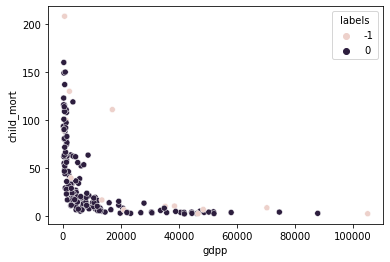

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='gdpp', y='child_mort',hue="labels",data=df)
plt.show()